In [1]:
import pandas as pd
import numpy as np

In [2]:
A = pd.read_csv('./MovieSummaries/MovieSummaries/character.metadata.tsv', sep='\t', header=None)

In [3]:
B = pd.read_csv('./MovieSummaries/MovieSummaries/movie.metadata.tsv', sep='\t', header=None,
               names=['Wikipedia_ID', 'Freebase_ID', 'Movie_name', 'Release_date', 'Box_office', 'Runtime',
                     'Movie_languages', 'Movie_countries', 'Movie_genres'])

In [4]:
C = pd.read_csv('./MovieSummaries/MovieSummaries/plot_summaries.txt', sep='\t', header=None)

In [5]:
C[1][0]

"Shlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."

In [7]:
c = B['Wikipedia_ID'].unique()
len(c)

81741

In [8]:
def process_release_date(df):
    def extract_year(value):
        if pd.isna(value):
            return np.nan
        try:
            # Try to convert to datetime first
            return pd.to_datetime(value).year
        except:
            # If it fails, check if it's a year
            if isinstance(value, (int, float)) or (isinstance(value, str) and value.isdigit()):
                return int(float(value))
            return np.nan

    # Apply the function to the 'Release_date' column
    df['Release_date'] = df['Release_date'].apply(extract_year)
    
    # Ensure the column is of type Int64 to handle NaN values
    df['Release_date'] = df['Release_date'].astype('Int64')
    
    return df

A = B.copy()
# Assuming your dataframe is named 'df'
A = process_release_date(A)

# Display the first few rows to verify the changes
print(A['Release_date'].head())

0    2001
1    2000
2    1988
3    1987
4    1983
Name: Release_date, dtype: Int64


In [9]:
B.isna().mean()

Wikipedia_ID       0.000000
Freebase_ID        0.000000
Movie_name         0.000000
Release_date       0.084437
Box_office         0.897224
Runtime            0.250180
Movie_languages    0.000000
Movie_countries    0.000000
Movie_genres       0.000000
dtype: float64

In [10]:
A.isna().mean()

Wikipedia_ID       0.000000
Freebase_ID        0.000000
Movie_name         0.000000
Release_date       0.084450
Box_office         0.897224
Runtime            0.250180
Movie_languages    0.000000
Movie_countries    0.000000
Movie_genres       0.000000
dtype: float64

In [11]:
A.Release_date.describe()

count    74838.000000
mean      1977.489457
std         28.886039
min       1888.000000
25%       1956.000000
50%       1985.000000
75%       2004.000000
max       2016.000000
Name: Release_date, dtype: float64

In [12]:
A[A['Release_date']==1888]

,Wikipedia_ID,Freebase_ID,Movie_name,Release_date,Box_office,Runtime,Movie_languages,Movie_countries,Movie_genres
57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."


In [13]:
A[A['Release_date']==2016]

,Wikipedia_ID,Freebase_ID,Movie_name,Release_date,Box_office,Runtime,Movie_languages,Movie_countries,Movie_genres
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016,NaN,NaN,{},{},{}
34022,23124260,/m/064mmw7,Jeepers Creepers 4,2016,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}"
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


In [14]:
# Assuming df is your DataFrame and 'year_column' is the column with years
C = A.copy()
year_occurrences = C['Release_date'].value_counts().sort_index()

# Display the number of occurrences by year
print(year_occurrences)

1888       1
1889       1
1890       2
1891       3
1892       3
        ... 
2012    1194
2013     164
2014      17
2015       4
2016       3
Name: Release_date, Length: 129, dtype: Int64


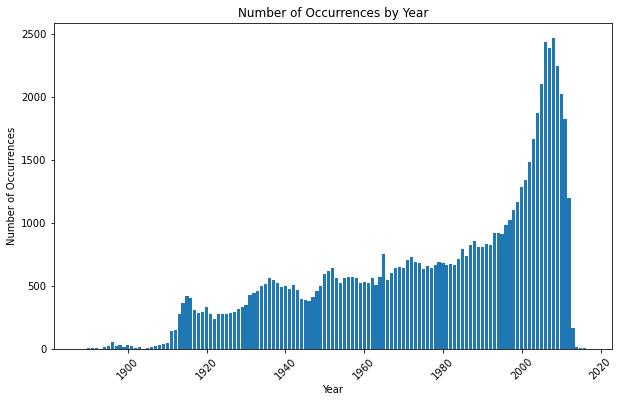

In [15]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(year_occurrences.index, year_occurrences.values)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences by Year')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [16]:
A.Movie_countries

0                {"/m/09c7w0": "United States of America"}
1                {"/m/09c7w0": "United States of America"}
2                                   {"/m/05b4w": "Norway"}
3                           {"/m/07ssc": "United Kingdom"}
4                                  {"/m/0345h": "Germany"}
                               ...                        
81736            {"/m/09c7w0": "United States of America"}
81737    {"/m/03rt9": "Ireland", "/m/07ssc": "United Ki...
81738            {"/m/09c7w0": "United States of America"}
81739                                {"/m/03_3d": "Japan"}
81740                              {"/m/0d060g": "Canada"}
Name: Movie_countries, Length: 81741, dtype: object

In [17]:
def extract_countries(country_dict):
    # If it's a dictionary, return the country names as a list
    if isinstance(country_dict, dict):
        return ', '.join(country_dict.values())  # Join country names with a comma
    return None  # Return None for missing or invalid rows

D = A.copy()
# Apply the extraction function to the column
def extract_country_name(country_string):
    if isinstance(country_string, str):
        # Split the string to extract the country name
        return country_string.split(': ')[1].strip('"}')
    return None

# Apply the function to clean the column
D['Cleaned_countries'] = D['Movie_countries'].apply(extract_country_name)

# Preview the cleaned column
print(D['Cleaned_countries'].head())

IndexError: list index out of range

In [18]:
a = A['Movie_countries'][0]
a

'{"/m/09c7w0": "United States of America"}'

In [19]:
a.split(': ')[1].strip('"}')

'United States of America'

In [20]:
D = A.copy()
D.head(100)

,Wikipedia_ID,Freebase_ID,Movie_name,Release_date,Box_office,Runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
95,29832307,/m/061l7z,The Thirteen Chairs,1969,NaN,94.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/03rjj"": ""Italy""}","{""/m/05p553"": ""Comedy film"", ""/m/01z4y"": ""Come..."
96,24039457,/m/0crx1wl,ZA: Zombies Anonymous,2005,NaN,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0gf28"": ""Parody"", ""/m/0qdzd"": ""B-movie"", ..."
97,31322464,/m/0gj8s31,Youth Sports Festival,1951,NaN,NaN,"{""/m/04306rv"": ""German Language""}","{""/m/03f2w"": ""German Democratic Republic""}","{""/m/01z02hx"": ""Sports"", ""/m/0jtdp"": ""Document..."
98,5894429,/m/0fc8w8,Closing the Ring,2007,NaN,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""..."


In [21]:
import re
def extract_countries_from_string(country_string):
    if isinstance(country_string, str) and country_string != '{}':
        # Use regex to find all country names (text inside double quotes after the colon)
        return ', '.join(re.findall(r'": "([^"]+)"', country_string))  # Extract country names after ": "
    return np.nan  # Return NaN for empty strings or {}

# Apply the function to extract country names
D['Cleaned_countries'] = D['Movie_countries'].apply(extract_countries_from_string)

# Find unique countries
# Flatten the list of country names and extract unique values
unique_countries = pd.Series([country for countries in D['Cleaned_countries'].dropna() 
                              for country in countries.split(', ')]).unique()

# Show results
print("Cleaned DataFrame:")
print(D[['Movie_countries', 'Cleaned_countries']])
print("\nUnique countries:")
print(unique_countries)

Cleaned DataFrame:
                                         Movie_countries  \
0              {"/m/09c7w0": "United States of America"}   
1              {"/m/09c7w0": "United States of America"}   
2                                 {"/m/05b4w": "Norway"}   
3                         {"/m/07ssc": "United Kingdom"}   
4                                {"/m/0345h": "Germany"}   
...                                                  ...   
81736          {"/m/09c7w0": "United States of America"}   
81737  {"/m/03rt9": "Ireland", "/m/07ssc": "United Ki...   
81738          {"/m/09c7w0": "United States of America"}   
81739                              {"/m/03_3d": "Japan"}   
81740                            {"/m/0d060g": "Canada"}   

              Cleaned_countries  
0      United States of America  
1      United States of America  
2                        Norway  
3                United Kingdom  
4                       Germany  
...                         ...  
81736  United States o

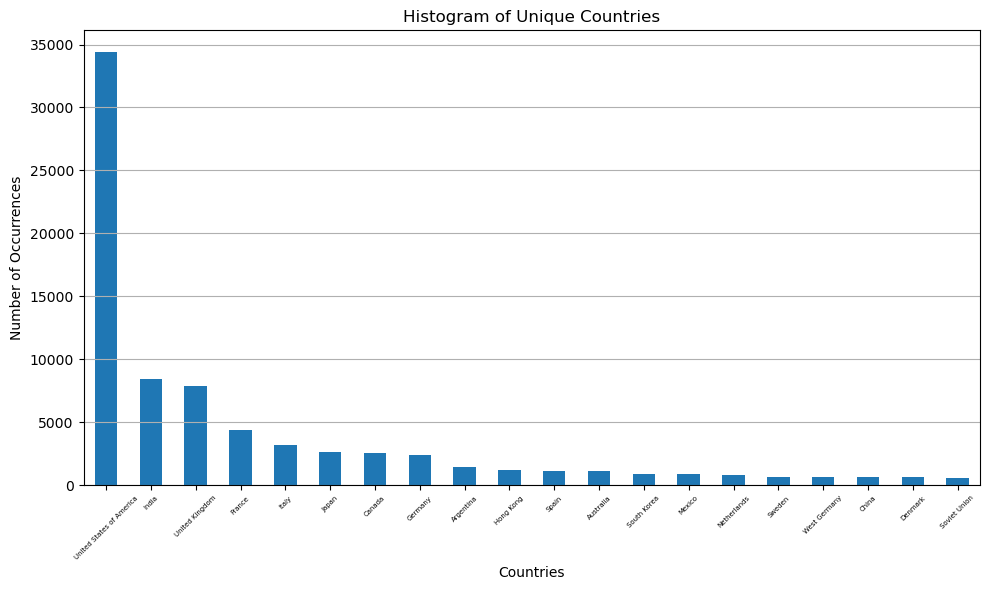

In [74]:
country_counts = D['Cleaned_countries'].dropna().str.split(', ').explode().value_counts()

# Create a histogram (bar plot)
plt.figure(figsize=(10, 6))
country_counts[:20].plot(kind='bar')
plt.title('Histogram of Unique Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, fontsize=5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [80]:
contains_star_wars = [name for name in D['Movie_name'] if "Mad Max" in name]
contains_star_wars

['Mad Max 2: The Road Warrior',
 'Mad Max',
 'Mad Max Beyond Thunderdome',
 'Mad Max 4: Fury Road']

In [87]:
d = D['Runtime']<60
d.sum()

6773

In [90]:
import re
E = D.copy()
def extract_countries_from_string(country_string):
    if isinstance(country_string, str) and country_string != '{}':
        # Use regex to find all country names (text inside double quotes after the colon)
        return ', '.join(re.findall(r'": "([^"]+)"', country_string))  # Extract country names after ": "
    return np.nan  # Return NaN for empty strings or {}

# Apply the function to extract country names
E['Cleaned_genres'] = E['Movie_genres'].apply(extract_countries_from_string)

# Find unique countries
# Flatten the list of country names and extract unique values
unique_genres = pd.Series([country for countries in E['Cleaned_genres'].dropna() 
                              for country in countries.split(', ')]).unique()

# Show results
print("Cleaned DataFrame:")
print(E[['Cleaned_genres']])
print("\nUnique genres:")
print(len(unique_genres))

Cleaned DataFrame:
                                          Cleaned_genres
0      Thriller, Science Fiction, Horror, Adventure, ...
1         Mystery, Biographical film, Drama, Crime Drama
2                                   Crime Fiction, Drama
3      Thriller, Erotic thriller, Psychological thriller
4                                                  Drama
...                                                  ...
81736                                              Drama
81737              Biographical film, Drama, Documentary
81738                                     Satire, Comedy
81739  Science Fiction, Japanese Movies, Adventure, A...
81740                    Thriller, Horror, Slasher, Teen

[81741 rows x 1 columns]

Unique genres:
363
